# <center> Dataset: Las Estrellas y Sus Propiedades </center>

<center> Patrick Vera Lopez - Bastian Velasquez</center>
<center> Mineria de Datos Seccion 001V</center>

# Parte 1: Conocimiento del Negocio

## Introducción

El dataset que utilizaremos para las siguientes operaciones se conforma un registro de estrellas encontradas en el
espacio acompañados de sus datos mas importantes y caracteristicos. Dentro de la ciencia de la astronomia, una estrella es una esfera de gas en un estado de equilibrio entre la gravedad que tiende a comprimirla y la presión del gas, que tiende a que se expanda. Las estrellas liberan energía en su interior mediante reacciones termonucleares.

Estas varian en color, tamaño, temperatura, magnitud y variados otros atributos, que juntos le entregan a cada estrella en el universo un caracter unico, pero al mismo tiempo reconocible y comparable con otras estrellas. 

## Objetivo

El dataset presentado tendra como funcion entregarnos un registro de datos para asi estudiarlos y verificar como estos se relacionan entre si, para posteriormente poder tener la capacidad de predecir el Tipo de Estrella mediante un algoritmo en base a Python.

## Informacion del Dataset

Al ser un dataset extraido de internet (https://www.kaggle.com/datasets/deepu1109/star-dataset) los datos y parametros entregados se encuentran en ingles, por lo que ahora entregaremos los nombres de las columnas en español acompañados de su nombre original

* Absolute Temperature (in K) - **Temperatura Absoluta (en Kelvin)**
* Relative Luminosity (L/Lo) - **Luminosidad Relativa (Luminosidad de Estrella/ Luminosidad de nuestro Sol)**
* Relative Radius (R/Ro) - **Radio Relativo (Radio de Estrella/ Radio de nuestro Sol)**
* Absolute Magnitude (Mv) - **Magnitud Absoluta**
* Star Color (white,Red,Blue,Yellow,yellow-orange etc) - **Color de Estrella (Blanco, Rojo, Azul, Amarillo, Amarillo- Naranjo, etc.)**
* Spectral Class (O,B,A,F,G,K,,M) - **Clase Espectral**
* Star Type - **Tipo de Estrella (Enano Rojo, Enano Marrón, Enano Blanco, Secuencia Principal, Super Gigantes, Hiper Gigantes)**

Como se puede apreciar, se poseen variados atributos, lo que nos da la capacidad de utilizar dichos datos y poder realizar un ejercicio de prediccion que desarrollaremos mas adelante en este notebook.

## Carga de datos y visualización de datos
En esta parte de la codificación se importa Pandas, Numpy y matplotlib.pylot para usar las funciones de estas librerias con el fin de ejecutar de forma correcta nuestro dataset

In [69]:
# Importamos las funciones que utilizaremos en el desarrollo de este dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Creamos un dataset con los datos de nuestro archivo CSV
data_estrella = pd.read_csv("estrellas.csv")
# Agregamos una columna Index para posteriores analisis
data_estrella = pd.concat([data_estrella],axis = 1).reset_index()
# Mostramos nuestros datos
data_estrella

,index,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,0,3068,0.002400,0.1700,16.12,0,Red,M
1,1,3042,0.000500,0.1542,16.60,0,Red,M
2,2,2600,0.000300,0.1020,18.70,0,Red,M
3,3,2800,0.000200,0.1600,16.65,0,Red,M
4,4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,238,9235,404940.000000,1112.0000,-11.23,5,White,A


La funcion de este codigo es hacer una traducción de ingles al español de las filas de la tabla.

In [71]:
# Traducir columnas
data_estrella.columns = ["index","Temperatura","Luminosidad","Radio" ,"Magnitud Absoluta","Tipo de Estrella","Color de Estrella","Clase Espectral"]

El codigo que se mostrará a continuación se muestra la informacion completa de nuestro DataSet, junto sus respectivas columnas, y su tipo de dato.

In [72]:
# Informacion del Dataset
data_estrella.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              240 non-null    int64  
 1   Temperatura        240 non-null    int64  
 2   Luminosidad        240 non-null    float64
 3   Radio              240 non-null    float64
 4   Magnitud Absoluta  240 non-null    float64
 5   Tipo de Estrella   240 non-null    int64  
 6   Color de Estrella  240 non-null    object 
 7   Clase Espectral    240 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 15.1+ KB


<br>Podemos ver que poseemos un dataset de 240 registros, cada uno con 7 atributos para cada estrella registrada. 

Todos los registros detectados no encuentran valores nulos, osea no se ausenta ningun atributo de las estrellas que tenemos. Esto nos beneficia especialmente en la limpieza de datos.

# Parte 2: Conocimiento de los datos

## Consulta de Negocios 1: ¿Cual es la t° promedio de las estrellas mas presentes dentro de la Clase M?

Dentro de nuestros parametros, la Clase Espectral nos da un estimado del tipo y otros valores de nuestras estrellas. Es una forma mas eficiente de clasificar estas estrellas con valores faciles de reconocer.

Durante nuestra busqueda dentro de nuestro dataset, hemos de ver como tenemos 40 estrellas para cada Tipo de Estrella:

In [73]:
# Agrupamos los registros por Tipo de Estrella
data_estrella.groupby("Tipo de Estrella")["index"].nunique()

Tipo de Estrella
0    40
1    40
2    40
3    40
4    40
5    40
Name: index, dtype: int64

Pero, en cambio, la distribucion de registros en la Clase Espectral es mas dispersa:

In [74]:
# Agrupamos los registros por Clase Espectral
data_estrella.groupby("Clase Espectral")["index"].nunique()

Clase Espectral
A     19
B     46
F     17
G      1
K      6
M    111
O     40
Name: index, dtype: int64

(array([111.,  46.,   0.,  19.,   0.,  17.,  40.,   0.,   6.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

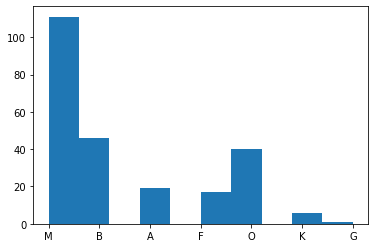

In [75]:
plt.hist(data_estrella["Clase Espectral"])

Por esto mismo queremos ver que tipos de estrellas podemos encontrar con mayor frecuencia en la clase mas poblada de nuestro dataset, y en base a esto, investigar cual es la temperatura promedio de estas estrellas.

In [76]:
# Extraemos los valores con los que trabajaremos, en este caso: index, Tipo de Estrella, Clase Espectral y Temperatura
data_1 = data_estrella[["index","Tipo de Estrella","Clase Espectral","Temperatura"]]
# Luego, estos datos se ingresan en un dataset, donde solo guardaremos aquellos datos que pertenescan a la Clase M
data_clase_m = data_1[data_1["Clase Espectral"] == "M"]
# Mostramos en pantalla el resultado
data_clase_m

,index,Tipo de Estrella,Clase Espectral,Temperatura
0,0,0,M,3068
1,1,0,M,3042
2,2,0,M,2600
3,3,0,M,2800
4,4,0,M,1939
...,...,...,...,...
195,195,1,M,3598
196,196,1,M,3142
197,197,1,M,3496
198,198,1,M,3324


Hecho esto, ahora buscaremos el Tipo de Estrella que mas esta presente en esta clase

In [77]:
data_clase_m.groupby("Tipo de Estrella")["index"].nunique()

Tipo de Estrella
0    40
1    40
4     9
5    22
Name: index, dtype: int64

Con esto, confirmamos que el Tipo 0 y 1 (Enano Rojo y Enano Marrón respectivamente) son los que se encuentran en la mayoria de los registros.

Esto nos da a entender que toda estrella que este dentro de estos tipos siempre sera de Clase Espectral M.

Ahora, el atributo que nos data un claro valor de referencia para ver si las nuevas estrellas pertenecen a esta clase seria la temperatura, por lo que a continuacion extraeremos solo los datos que sean de Tipo 0 y 1 para poder ver su promedio y asi, en un futuro, poder catalogar los nuevos registros.

In [78]:
# Extraemos solo los registros que pertenezcan al tipo de estrella 0 y 1
data_tipo1 = data_1[data_1["Tipo de Estrella"] == 1] 
data_tipo0 = data_1[data_1["Tipo de Estrella"] == 0] 
# Concatenamos los registros de los datasets
data_tipo01 = pd.concat([data_tipo1, data_tipo0], axis = 0)
# Mostramos el resultado en pantalla
data_tipo01

,index,Tipo de Estrella,Clase Espectral,Temperatura
10,10,1,M,3600
11,11,1,M,3129
12,12,1,M,3134
13,13,1,M,3628
14,14,1,M,2650
...,...,...,...,...
185,185,0,M,2889
186,186,0,M,2968
187,187,0,M,3484
188,188,0,M,2778


In [79]:
# Verificamos el conteo de los registros
data_tipo01.groupby("Tipo de Estrella")["index"].nunique()

Tipo de Estrella
0    40
1    40
Name: index, dtype: int64

Con nuestro dataset listo, podemos analizar el parametro de temperatura

In [80]:
# Extraemos los datos de T° de nuestro dataset y calculamos su promedio 
promedio_temperatura = data_tipo01["Temperatura"].mean()

In [81]:
# Mostramos el resultado en pantalla
promedio_temperatura

3140.8875

Como podemos ver, dentro de la Clase M de estrellas, las estrellas de Tipo 0 y 1 son las predominantes, y el promedio de tempertura de estas es de **3.140,88 Kelvin**, lo que equivale a **31.408.601,85 Celsius**

## Consulta 2: ¿Cual es la variacion del radio entre las estrellas mas frias y las mas calientes de color Rojo?

Dentro de las estrellas mas comunes dentro de nuestro universo, las que mas estan presentes son las estrellas rojas. Sus caracteristicas mas significativas es que estas son las estrellas mas frias que pueden existir y, al mismo tiempo, son las que poseen la mayor esperanza de vida de todas, estimado a llegar a vivir billones de años.

Por lo mismo, queremos ver como estas estrellas pueden variar entre ellas mismas. Analizaremos la variacion del promedio del radio de estas estrellas entre las mas frias y las mas calientes de las estrellas rojas.

In [82]:
# Extraemos los datos que utilizaremos, que son el index, el color y la temperatura
data_2 = data_estrella[["index","Color de Estrella","Radio","Temperatura"]]
# Guardamos solo los valores de las estrellas rojas
data_rojas = data_2[data_2["Color de Estrella"] == "Red"]
# Mostramos en pantalla un .describe()
data_rojas.describe()

,index,Radio,Temperatura
count,112.000000,112.000000,112.000000
mean,95.383929,283.529700,3291.785714
std,62.267983,558.149251,490.780761
min,0.000000,0.057000,1939.000000
25%,47.750000,0.117500,2987.500000
50%,77.500000,0.299000,3324.000000
75%,135.250000,26.000000,3550.750000
max,199.000000,1673.000000,6850.000000


Como se puede ver, tenemos aca los valores que nos daran una idea de lo que estamos buscando, que es el valor de la mediana de la temperatura (esta siendo 3324 Kelvin), con el cual haremos la division de los datos para asi sacar nuestros promedios.

In [83]:
# Filtramos los datos por aquellos que sean mas frios a la mediana de la temperatura
data_frias = data_rojas[data_rojas["Temperatura"] <= 3324]
data_frias.describe()

,index,Radio,Temperatura
count,57.000000,57.000000,57.000000
mean,89.456140,2.460732,2976.842105
std,65.902544,12.185889,255.088205
min,0.000000,0.078200,1939.000000
25%,18.000000,0.098700,2831.000000
50%,75.000000,0.130000,2989.000000
75%,133.000000,0.280000,3180.000000
max,198.000000,88.000000,3324.000000


In [84]:
# Filtramos los datos por aquellos que sean mas calientes a la mediana de la temperatura
data_calientes = data_rojas[data_rojas["Temperatura"] >= 3324]
data_calientes.describe()

,index,Radio,Temperatura
count,57.000000,57.000000,57.000000
mean,103.859649,554.664486,3607.859649
std,58.769051,681.890875,457.984694
min,10.000000,0.057000,3324.000000
25%,54.000000,0.319000,3459.000000
50%,112.000000,19.000000,3550.000000
75%,139.000000,1324.000000,3614.000000
max,199.000000,1673.000000,6850.000000


Teniendo los datos separados por cada uno de los es hora de mostrar nuestros promedios y la variacion que este parametro posee:

In [85]:
prod_frias = data_frias["Radio"].mean()
print("El promedio del radio entre las estrellas frias es: ", prod_frias)

print()

prod_calientes = data_calientes["Radio"].mean()
print("El promedio del radio entre las estrellas calientes es: ", prod_calientes)

print()

var_prod = (prod_calientes-prod_frias)
print("La variacion del radio entre las estrellas frias y calientes es: ", var_prod)


El promedio del radio entre las estrellas frias es:  2.4607315789473696

El promedio del radio entre las estrellas calientes es:  554.6644859649124

La variacion del radio entre las estrellas frias y calientes es:  552.203754385965


Como se puede ver, la tempera resulta ser escencial para definir cual es el radio de nuestras estrellas, aun si estas compartan atributos caracteristicos o pertenescan a un grupo especifico.

Concluimos que la variacion del radio relativo entre las estrellas frias y calientes de color rojo es de: 552.203 Radio Relativo

Ahora bien, ¿que significa esto en realidad? Estos datos aun no nos entregan la informacion completa. Anteriormente mencionamos en los Atributos que el Radio Relativo de nuestro dataset es el resultado de una funcion, la cual es "Radio de la Estrella / Radio de Nuestro Sol", por lo que necesitaremos extraer esta informacion final.

In [86]:
# Multiplicamos ambos promedios por 696.34 millones, lo que es el radio de nuestro Sol en metros
prod_frias_real = prod_frias*696340000
print("El promedio del radio real entre las estrellas frias es: ", prod_frias_real)

print()

prod_calientes_real = prod_calientes*696340000
print("El promedio del radio real entre las estrellas calientes es: ", prod_calientes_real)

print()

var_prod_real = (prod_calientes_real-prod_frias_real)
print("La variacion del radio real entre las estrellas frias y calientes es: ", var_prod_real)


El promedio del radio real entre las estrellas frias es:  1713505827.6842113

El promedio del radio real entre las estrellas calientes es:  386235068156.80707

La variacion del radio real entre las estrellas frias y calientes es:  384521562329.12286


Esto nos termina entregando un valor de variacion del radio real de 384.5 mil millones de metros, lo cual seria aproximadamente 2,5 veces la distancia entre la Tierra y el Sol.

# Parte 3: Limpieza de Datos

## Tipos de Datos de las Columnas del Dataset

A continuacion, veremos una de las columnas ingresadas en nuestro dataset, Color de Estrella.

Debido a la ausencia de un identificador unico para los registros, debemos hacer un index para navegar de mejor manera.

In [87]:
data_estrella.head(240)

,index,Temperatura,Luminosidad,Radio,Magnitud Absoluta,Tipo de Estrella,Color de Estrella,Clase Espectral
0,0,3068,0.002400,0.1700,16.12,0,Red,M
1,1,3042,0.000500,0.1542,16.60,0,Red,M
2,2,2600,0.000300,0.1020,18.70,0,Red,M
3,3,2800,0.000200,0.1600,16.65,0,Red,M
4,4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,238,9235,404940.000000,1112.0000,-11.23,5,White,A


Realicemos un "groupby.nunique()" para poder ver como se agrupan estos datos.

In [88]:
# Revisamos el conteo de los colores para corroborar
data_estrella.groupby("Color de Estrella")["index"].nunique()

Color de Estrella
Blue                   55
Blue                    1
Blue White             10
Blue white              3
Blue white              1
Blue-White              1
Blue-white             26
Orange                  2
Orange-Red              1
Pale yellow orange      1
Red                   112
White                   7
White-Yellow            1
Whitish                 2
Yellowish               1
Yellowish White         3
white                   3
yellow-white            8
yellowish               2
Name: index, dtype: int64

Como podemos ver en el resultado de la consulta anterior, se ven colores que se repiten pero son separados por la manera en las que estan escritas, por lo que tenemos que organizar los datos de manera correcta dentro del dataset original, esto con la intencion de normalizar y limpiar los datos que tenenmos para los futuros analisis.

Se realiza el cambio y a continuación se mostrará el resultado con el codigo "data_color.head(50)"

In [89]:
# Realizamos el cambio y vemos el resultado
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Red'],'0')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['White'],'1')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Whitish'],'1')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['white'],'1')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue'],'2')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue '],'2')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Yellowish'],'3')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['yellowish'],'3')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Yellowish White'],'3')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['yellow-white'],'3')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['White-Yellow'],'3')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Orange'],'4')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Orange-Red'],'4')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Pale yellow orange'],'4')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue White'],'5')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue white'],'5')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue white '],'5')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue-white'],'5')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue-White'],'5')

data_estrella.head(50)

,index,Temperatura,Luminosidad,Radio,Magnitud Absoluta,Tipo de Estrella,Color de Estrella,Clase Espectral
0,0,3068,0.002400,0.17000,16.120,0,0,M
1,1,3042,0.000500,0.15420,16.600,0,0,M
2,2,2600,0.000300,0.10200,18.700,0,0,M
3,3,2800,0.000200,0.16000,16.650,0,0,M
4,4,1939,0.000138,0.10300,20.060,0,0,M
5,5,2840,0.000650,0.11000,16.980,0,0,M
6,6,2637,0.000730,0.12700,17.220,0,0,M
7,7,2600,0.000400,0.09600,17.400,0,0,M
8,8,2650,0.000690,0.11000,17.450,0,0,M
9,9,2700,0.000180,0.13000,16.050,0,0,M


Se revisará el conteo de los colores para confirmar que están bien agrupados

In [90]:
# Revisamos el conteo de los colores para corroborar
data_estrella.groupby("Color de Estrella")["index"].nunique()

Color de Estrella
0    112
1     12
2     56
3     15
4      4
5     41
Name: index, dtype: int64

Ahora tenemos nuestros colores categorizados en numeros, esto con el fin de agilizar la prediccion de los futuros modelos.
* Rojo (0)
* Blanco (1) 
* Azul (2)
* Amarrillento (3)
* Naranja (4)
* Celeste (5)

En el siguiente codigo se va a graficar el resultado de "Color de estrella"

(array([112.,   0.,  41.,   0.,  12.,   0.,  15.,   0.,   4.,  56.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

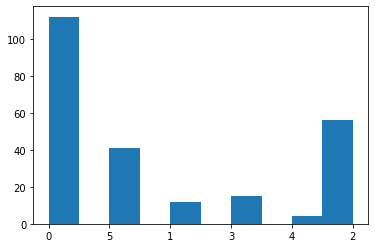

In [91]:
# Grafiquemos nuestro resultado
plt.hist(data_estrella["Color de Estrella"])

Hecho esto, pasamos a limpiar los datos de Clase Espectral. Estos datos estan escritos de manera correcta, pero requerimos de reescribirlos a numero para ayudar a nuestros algoritmos a comprender los datos de mejor manera.

In [92]:
# Revisamos el conteo de los clases para ver los valores existentes
data_estrella.groupby("Clase Espectral")["index"].nunique()

Clase Espectral
A     19
B     46
F     17
G      1
K      6
M    111
O     40
Name: index, dtype: int64

In [93]:
# Cambiamos los valores por digitos y mostramos una muestra del resultado
data_estrella["Clase Espectral"] = data_estrella["Clase Espectral"].replace(['A'],'0')
data_estrella["Clase Espectral"] = data_estrella["Clase Espectral"].replace(['B'],'1')
data_estrella["Clase Espectral"] = data_estrella["Clase Espectral"].replace(['F'],'2')
data_estrella["Clase Espectral"] = data_estrella["Clase Espectral"].replace(['G'],'3')
data_estrella["Clase Espectral"] = data_estrella["Clase Espectral"].replace(['K'],'4')
data_estrella["Clase Espectral"] = data_estrella["Clase Espectral"].replace(['M'],'5')
data_estrella["Clase Espectral"] = data_estrella["Clase Espectral"].replace(['O'],'6')
data_estrella

,index,Temperatura,Luminosidad,Radio,Magnitud Absoluta,Tipo de Estrella,Color de Estrella,Clase Espectral
0,0,3068,0.002400,0.1700,16.12,0,0,5
1,1,3042,0.000500,0.1542,16.60,0,0,5
2,2,2600,0.000300,0.1020,18.70,0,0,5
3,3,2800,0.000200,0.1600,16.65,0,0,5
4,4,1939,0.000138,0.1030,20.06,0,0,5
...,...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,2,6
236,236,30839,834042.000000,1194.0000,-10.63,5,2,6
237,237,8829,537493.000000,1423.0000,-10.73,5,1,0
238,238,9235,404940.000000,1112.0000,-11.23,5,1,0


In [94]:
# Revisamos el conteo de los clases para corroborar
data_estrella.groupby("Clase Espectral")["index"].nunique()

Clase Espectral
0     19
1     46
2     17
3      1
4      6
5    111
6     40
Name: index, dtype: int64

# Parte 4: Modelo

**KNN K-nearest neighbors (por realizar)**

In [95]:
# Importar Algoritmo
from sklearn.neighbors import KNeighborsClassifier
# Nombramos nuestro algoritmo
knn = KNeighborsClassifier(n_neighbors=1)
# Definimos nuestra variable x, correspondiente a los predictores
x = data_estrella[["Temperatura","Magnitud Absoluta","Radio","Luminosidad","Color de Estrella","Clase Espectral"]]
# Definimos nuestra variable y, correspondiente al target
y = data_estrella[["Tipo de Estrella"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [96]:
# Le entregamos nuestros datos al algoritmo y este entrena en base a los datos entregados
knn.fit(x_train, y_train)

C:\Users\cesar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [97]:
y_predict = knn.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix
ma = confusion_matrix(y_test, y_predict)
print("Matriz de Confusion: ")
print(ma)

Matriz de Confusion: 
[[3 6 0 0 0 0]
 [1 9 0 0 0 0]
 [0 0 9 0 0 0]
 [0 1 2 9 0 0]
 [0 0 0 0 9 6]
 [0 0 0 0 0 5]]


In [99]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predict))

0.7333333333333333


**Arbol de Decision**

In [26]:
from sklearn.tree import DecisionTreeClassifier
#max_depth limita el crecimiento del arbol
dtree=DecisionTreeClassifier()
dtree.fit(X,y)
y_pred = dtree.predict(X)
print(metrics.accuracy_score(y, y_pred))
print (metrics.confusion_matrix(y, y_pred))

0.9733333333333334
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
